In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [364]:
teams = pd.read_csv('Teams.csv')
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [365]:
teams = teams[teams['G'] >=150]
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
279,1892,NL,BLN,BLO,NaN,12,152,NaN,46,101,NaN,NaN,N,NaN,779,5296,1343,160,111,30,499.0,480.0,227.0,NaN,62.0,NaN,1020,618,4.28,131,2,2,3896,1537,51,536,437,584,100,0.910,Baltimore Orioles,Union Park,93589.0,103,104,BLN,BLN,BLN
280,1892,NL,BRO,LAD,NaN,3,158,NaN,95,59,NaN,NaN,N,NaN,935,5485,1439,183,105,30,629.0,508.0,409.0,NaN,54.0,NaN,733,507,3.25,132,12,5,4217,1285,26,600,597,398,98,0.940,Brooklyn Grooms,Eastern Park,183727.0,96,96,BRO,BRO,BRO
281,1892,NL,BSN,ATL,NaN,1,152,NaN,102,48,NaN,NaN,Y,NaN,862,5301,1325,203,51,34,526.0,492.0,338.0,NaN,62.0,NaN,649,424,2.86,142,15,1,4008,1156,41,460,514,454,128,0.929,Boston Beaneaters,South End Grounds II,146421.0,109,107,BSN,BSN,BSN
283,1892,NL,CIN,CIN,NaN,5,155,NaN,82,68,NaN,NaN,N,NaN,766,5349,1291,155,75,44,503.0,476.0,270.0,NaN,38.0,NaN,731,485,3.17,130,8,2,4132,1327,39,535,437,402,140,0.939,Cincinnati Reds,League Park I in Cincinnati,196473.0,99,99,CIN,CIN,CIN
284,1892,NL,CL4,CLV,NaN,2,152,NaN,93,56,NaN,NaN,N,NaN,855,5412,1376,196,96,26,552.0,538.0,225.0,NaN,40.0,NaN,613,358,2.41,140,11,2,4008,1178,28,413,472,407,95,0.935,Cleveland Spiders,League Park I,139928.0,104,103,CLV,CL4,CL4


In [366]:
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [367]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 279 to 2864
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2344 non-null   int64  
 1   lgID            2344 non-null   object 
 2   teamID          2344 non-null   object 
 3   franchID        2344 non-null   object 
 4   divID           1266 non-null   object 
 5   Rank            2344 non-null   int64  
 6   G               2344 non-null   int64  
 7   Ghome           2295 non-null   float64
 8   W               2344 non-null   int64  
 9   L               2344 non-null   int64  
 10  DivWin          1266 non-null   object 
 11  WCWin           656 non-null    object 
 12  LgWin           2344 non-null   object 
 13  WSWin           2279 non-null   object 
 14  R               2344 non-null   int64  
 15  AB              2344 non-null   int64  
 16  H               2344 non-null   int64  
 17  2B              2344 non-null  

In [368]:
len(teams)

2344

In [369]:
teams.isnull().sum()

yearID               0
lgID                 0
teamID               0
franchID             0
divID             1078
Rank                 0
G                    0
Ghome               49
W                    0
L                    0
DivWin            1078
WCWin             1688
LgWin                0
WSWin               65
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                 110
SB                   0
CS                 446
HBP               1069
SF                1102
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                14
attendance          16
BPF        

In [370]:
teams.drop(['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin',
             'WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR',
             'teamIDlahman45','teamIDretro','franchID'],axis=1, inplace=True)

teams.columns

Index(['yearID', 'teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB',
       'SO', 'SB', 'CS', 'HBP', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP'],
      dtype='object')

In [371]:
teams.isnull().sum()

yearID       0
teamID       0
G            0
W            0
R            0
AB           0
H            0
2B           0
3B           0
HR           0
BB           0
SO         110
SB           0
CS         446
HBP       1069
RA           0
ER           0
ERA          0
CG           0
SHO          0
SV           0
IPouts       0
HA           0
HRA          0
BBA          0
SOA          0
E            0
DP           0
FP           0
dtype: int64

In [0]:
mean_so = teams.groupby('yearID').mean()['SO']

In [0]:
def fillna_so(yearID,SO):
  if np.isnan(SO):
        return mean_db[yearID]
  else:
        return SO

In [0]:
teams['SO'] = teams.apply(lambda x: fillna_so(x['yearID'], x['SO']), axis=1)

In [375]:
teams.isnull().sum()

yearID       0
teamID       0
G            0
W            0
R            0
AB           0
H            0
2B           0
3B           0
HR           0
BB           0
SO           0
SB           0
CS         446
HBP       1069
RA           0
ER           0
ERA          0
CG           0
SHO          0
SV           0
IPouts       0
HA           0
HRA          0
BBA          0
SOA          0
E            0
DP           0
FP           0
dtype: int64

In [376]:
teams.drop(['CS','HBP'],axis=1,inplace=True)
teams.columns

Index(['yearID', 'teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB',
       'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA',
       'BBA', 'SOA', 'E', 'DP', 'FP'],
      dtype='object')

In [377]:
teams.isnull().sum()

yearID    0
teamID    0
G         0
W         0
R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
SV        0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

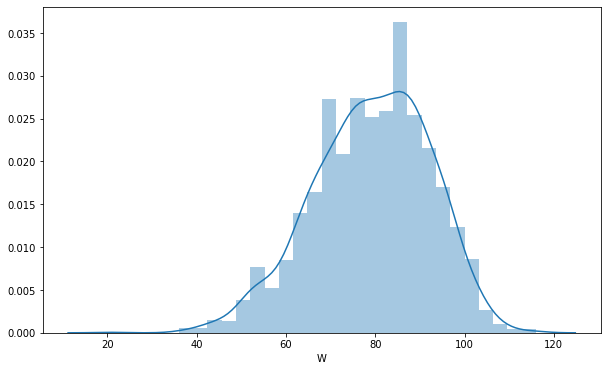

In [378]:
plt.figure(figsize=(10,6))
sns.distplot(teams['W'],bins=30)

In [379]:
teams['W'].mean()

79.1561433447099

In [0]:
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5

In [381]:
teams['win_bins'] = teams['W'].apply(assign_win_bins)
teams.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins
279,1892,BLN,152,46,779,5296,1343,160,111,30,499.0,480.0,227.0,1020,618,4.28,131,2,2,3896,1537,51,536,437,584,100,0.910,1
280,1892,BRO,158,95,935,5485,1439,183,105,30,629.0,508.0,409.0,733,507,3.25,132,12,5,4217,1285,26,600,597,398,98,0.940,4
281,1892,BSN,152,102,862,5301,1325,203,51,34,526.0,492.0,338.0,649,424,2.86,142,15,1,4008,1156,41,460,514,454,128,0.929,4
283,1892,CIN,155,82,766,5349,1291,155,75,44,503.0,476.0,270.0,731,485,3.17,130,8,2,4132,1327,39,535,437,402,140,0.939,3
284,1892,CL4,152,93,855,5412,1376,196,96,26,552.0,538.0,225.0,613,358,2.41,140,11,2,4008,1178,28,413,472,407,95,0.935,4


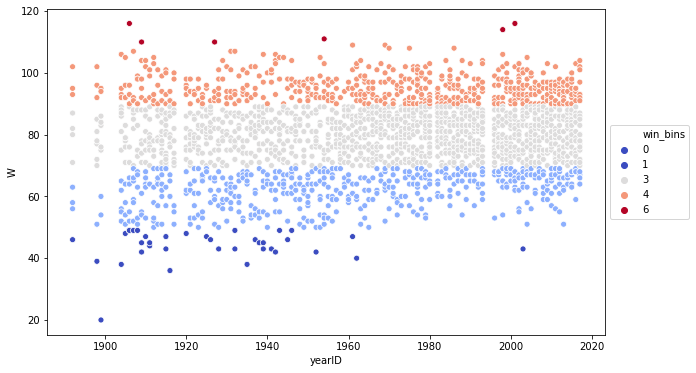

In [382]:
plt.figure(figsize=(10,6))
g = sns.scatterplot(x='yearID',y='W',data=teams,hue='win_bins',palette='coolwarm')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

In [383]:
runs_per_year = {}
games_per_year = {}

for i, row in teams.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{1892: 8753, 1898: 8491, 1899: 8780, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 14532, 1915: 14213, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 13695, 1931: 11892, 1932: 12116, 1933: 10288, 1934: 11325, 1935: 10498, 1936: 12846, 1937: 12070, 1938: 11260, 1939: 11876, 1940: 11568, 1941: 11168, 1942: 9457, 1943: 9694, 1944: 10353, 1945: 9729, 1946: 9953, 1947: 10827, 1948: 11328, 1949: 11426, 1950: 12013, 1951: 11268, 1952: 10349, 1953: 11426, 1954: 10827, 1955: 11069, 1956: 11031, 1957: 10636, 1958: 10578, 1959: 10853, 1960: 10664, 1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 19

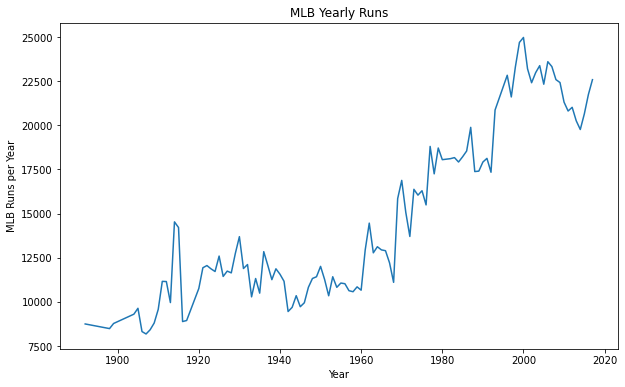

In [385]:
lists = sorted(runs_per_year.items())
x, y = zip(*lists)

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('MLB Yearly Runs')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Year')
plt.show()

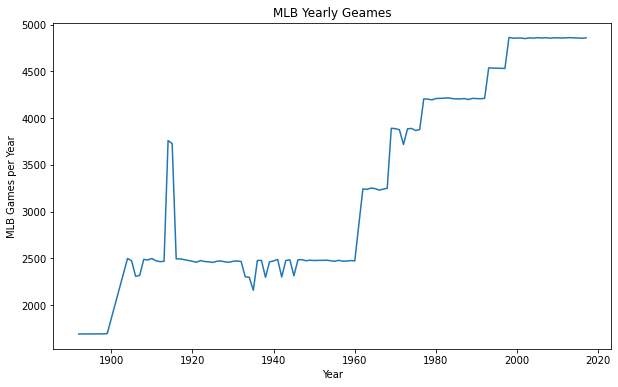

In [386]:
lists = sorted(games_per_year.items())
x, y = zip(*lists)

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('MLB Yearly Geames')
plt.xlabel('Year')
plt.ylabel('MLB Games per Year')
plt.show()

In [387]:
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
print(mlb_runs_per_game)

{1892: 5.1792899408284025, 1898: 5.021289178001183, 1899: 5.182998819362456, 1904: 3.7257806244995995, 1905: 3.896523848019402, 1906: 3.6072821846553964, 1907: 3.5330168321104876, 1908: 3.385450160771704, 1909: 3.5475423045930703, 1910: 3.8350680544435547, 1911: 4.512530315278901, 1912: 4.526785714285714, 1913: 4.037277147487845, 1914: 3.8648936170212767, 1915: 3.8125, 1916: 3.5641539695268647, 1917: 3.587810745789896, 1920: 4.360615883306321, 1921: 4.855573637103336, 1922: 4.870355411954765, 1923: 4.815085158150851, 1924: 4.761169780666125, 1925: 5.128664495114006, 1926: 4.636547811993517, 1927: 4.75121359223301, 1928: 4.729894394800975, 1929: 5.185923515052888, 1930: 5.5490275526742305, 1931: 4.810679611650485, 1932: 4.913219789132198, 1933: 4.467216673903604, 1934: 4.9303439268611235, 1935: 4.86468952734013, 1936: 5.188206785137318, 1937: 4.870863599677159, 1938: 4.902046147148455, 1939: 4.823720552396425, 1940: 4.679611650485437, 1941: 4.488745980707395, 1942: 4.111739130434783, 19

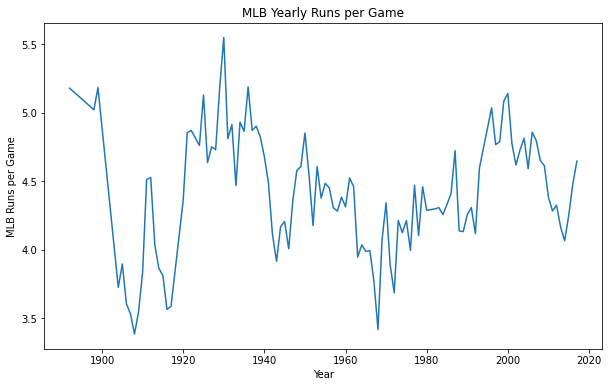

In [388]:
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')
plt.show()

In [0]:
def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8

In [390]:
teams['year_label'] = teams['yearID'].apply(assign_label)
teams.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,year_label
279,1892,BLN,152,46,779,5296,1343,160,111,30,499.0,480.0,227.0,1020,618,4.28,131,2,2,3896,1537,51,536,437,584,100,0.910,1,1
280,1892,BRO,158,95,935,5485,1439,183,105,30,629.0,508.0,409.0,733,507,3.25,132,12,5,4217,1285,26,600,597,398,98,0.940,4,1
281,1892,BSN,152,102,862,5301,1325,203,51,34,526.0,492.0,338.0,649,424,2.86,142,15,1,4008,1156,41,460,514,454,128,0.929,4,1
283,1892,CIN,155,82,766,5349,1291,155,75,44,503.0,476.0,270.0,731,485,3.17,130,8,2,4132,1327,39,535,437,402,140,0.939,3,1
284,1892,CL4,152,93,855,5412,1376,196,96,26,552.0,538.0,225.0,613,358,2.41,140,11,2,4008,1178,28,413,472,407,95,0.935,4,1


In [391]:
dummy_df = pd.get_dummies(teams['year_label'], prefix='era', drop_first=True)
dummy_df.head()

,era_2,era_3,era_4,era_5,era_6,era_7,era_8
279,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0
281,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0


In [392]:
teams = pd.concat([teams, dummy_df], axis=1)
teams.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,year_label,era_2,era_3,era_4,era_5,era_6,era_7,era_8
279,1892,BLN,152,46,779,5296,1343,160,111,30,499.0,480.0,227.0,1020,618,4.28,131,2,2,3896,1537,51,536,437,584,100,0.910,1,1,0,0,0,0,0,0,0
280,1892,BRO,158,95,935,5485,1439,183,105,30,629.0,508.0,409.0,733,507,3.25,132,12,5,4217,1285,26,600,597,398,98,0.940,4,1,0,0,0,0,0,0,0
281,1892,BSN,152,102,862,5301,1325,203,51,34,526.0,492.0,338.0,649,424,2.86,142,15,1,4008,1156,41,460,514,454,128,0.929,4,1,0,0,0,0,0,0,0
283,1892,CIN,155,82,766,5349,1291,155,75,44,503.0,476.0,270.0,731,485,3.17,130,8,2,4132,1327,39,535,437,402,140,0.939,3,1,0,0,0,0,0,0,0
284,1892,CL4,152,93,855,5412,1376,196,96,26,552.0,538.0,225.0,613,358,2.41,140,11,2,4008,1178,28,413,472,407,95,0.935,4,1,0,0,0,0,0,0,0


In [0]:
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

In [393]:
teams['mlb_rpg'] = teams['yearID'].apply(assign_mlb_rpg)
teams.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,year_label,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg
279,1892,BLN,152,46,779,5296,1343,160,111,30,499.0,480.0,227.0,1020,618,4.28,131,2,2,3896,1537,51,536,437,584,100,0.910,1,1,0,0,0,0,0,0,0,5.17929
280,1892,BRO,158,95,935,5485,1439,183,105,30,629.0,508.0,409.0,733,507,3.25,132,12,5,4217,1285,26,600,597,398,98,0.940,4,1,0,0,0,0,0,0,0,5.17929
281,1892,BSN,152,102,862,5301,1325,203,51,34,526.0,492.0,338.0,649,424,2.86,142,15,1,4008,1156,41,460,514,454,128,0.929,4,1,0,0,0,0,0,0,0,5.17929
283,1892,CIN,155,82,766,5349,1291,155,75,44,503.0,476.0,270.0,731,485,3.17,130,8,2,4132,1327,39,535,437,402,140,0.939,3,1,0,0,0,0,0,0,0,5.17929
284,1892,CL4,152,93,855,5412,1376,196,96,26,552.0,538.0,225.0,613,358,2.41,140,11,2,4008,1178,28,413,472,407,95,0.935,4,1,0,0,0,0,0,0,0,5.17929


In [0]:
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010

In [395]:
teams['decade_label'] = teams['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(teams['decade_label'], prefix='decade',drop_first=True)
decade_df.head()

,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
279,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0
281,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0


In [396]:
teams = pd.concat([teams, decade_df], axis=1)
teams.drop(['yearID','year_label','decade_label'], axis=1,inplace=True)
teams.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
279,BLN,152,46,779,5296,1343,160,111,30,499.0,480.0,227.0,1020,618,4.28,131,2,2,3896,1537,51,536,437,584,100,0.910,1,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0
280,BRO,158,95,935,5485,1439,183,105,30,629.0,508.0,409.0,733,507,3.25,132,12,5,4217,1285,26,600,597,398,98,0.940,4,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0
281,BSN,152,102,862,5301,1325,203,51,34,526.0,492.0,338.0,649,424,2.86,142,15,1,4008,1156,41,460,514,454,128,0.929,4,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0
283,CIN,155,82,766,5349,1291,155,75,44,503.0,476.0,270.0,731,485,3.17,130,8,2,4132,1327,39,535,437,402,140,0.939,3,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0
284,CL4,152,93,855,5412,1376,196,96,26,552.0,538.0,225.0,613,358,2.41,140,11,2,4008,1178,28,413,472,407,95,0.935,4,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0


In [397]:
teams['runs_per_game'] = teams['R']/teams['G']
teams['runs_allowed_per_game'] = teams['RA']/teams['G']
teams.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,runs_per_game,runs_allowed_per_game
279,BLN,152,46,779,5296,1343,160,111,30,499.0,480.0,227.0,1020,618,4.28,131,2,2,3896,1537,51,536,437,584,100,0.910,1,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0,5.125000,6.710526
280,BRO,158,95,935,5485,1439,183,105,30,629.0,508.0,409.0,733,507,3.25,132,12,5,4217,1285,26,600,597,398,98,0.940,4,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0,5.917722,4.639241
281,BSN,152,102,862,5301,1325,203,51,34,526.0,492.0,338.0,649,424,2.86,142,15,1,4008,1156,41,460,514,454,128,0.929,4,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0,5.671053,4.269737
283,CIN,155,82,766,5349,1291,155,75,44,503.0,476.0,270.0,731,485,3.17,130,8,2,4132,1327,39,535,437,402,140,0.939,3,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0,4.941935,4.716129
284,CL4,152,93,855,5412,1376,196,96,26,552.0,538.0,225.0,613,358,2.41,140,11,2,4008,1178,28,413,472,407,95,0.935,4,0,0,0,0,0,0,0,5.17929,0,0,0,0,0,0,0,0,0,0,5.625000,4.032895


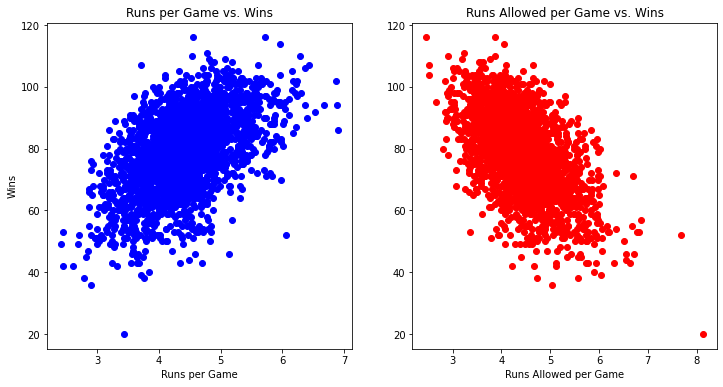

In [399]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(x='runs_per_game',y='W',data=teams,color='b')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')
ax2.scatter(x='runs_allowed_per_game',y='W',data=teams,color='r')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')
plt.show(fig)


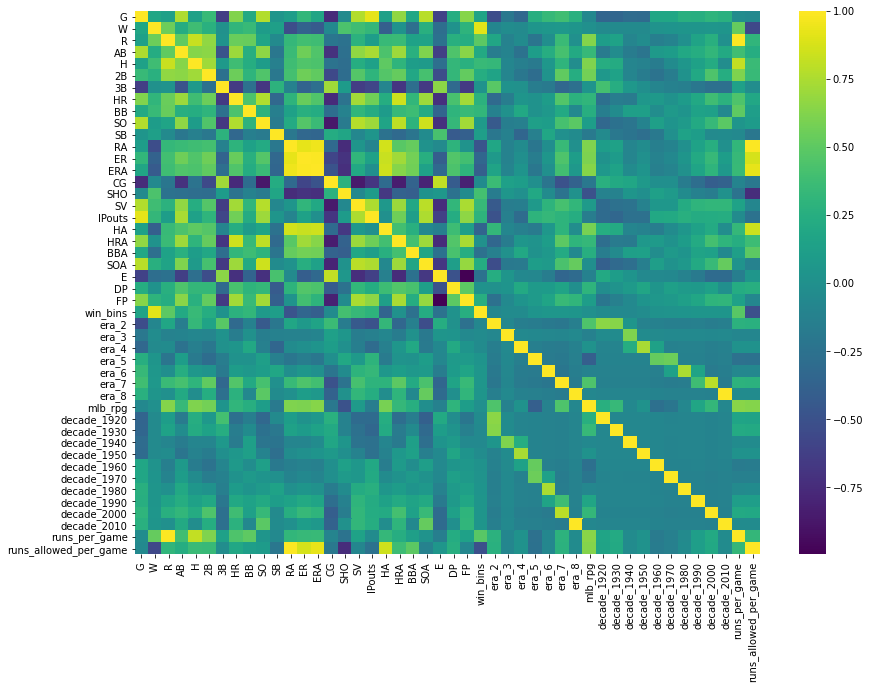

In [400]:
plt.figure(figsize=(14,10))
sns.heatmap(teams.corr(),cmap='viridis')
plt.show()

In [401]:
teams.corr()['W'].sort_values(ascending=False)

W                        1.000000
win_bins                 0.913000
R                        0.549188
runs_per_game            0.524434
SHO                      0.435098
H                        0.381802
SV                       0.376264
BB                       0.350046
IPouts                   0.328742
HR                       0.307676
FP                       0.297669
2B                       0.269314
SOA                      0.259465
AB                       0.234551
G                        0.181460
SB                       0.121607
SO                       0.095390
era_7                    0.066315
era_6                    0.058789
decade_2000              0.052573
decade_2010              0.047121
era_8                    0.047121
decade_1990              0.044426
decade_1980              0.043844
era_5                    0.042702
decade_1970              0.034287
decade_1960              0.029178
DP                       0.021717
HRA                      0.017332
3B            

In [402]:
teams.drop('teamID',axis=1,inplace=True)
teams.columns

Index(['G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA',
       'E', 'DP', 'FP', 'win_bins', 'era_2', 'era_3', 'era_4', 'era_5',
       'era_6', 'era_7', 'era_8', 'mlb_rpg', 'decade_1920', 'decade_1930',
       'decade_1940', 'decade_1950', 'decade_1960', 'decade_1970',
       'decade_1980', 'decade_1990', 'decade_2000', 'decade_2010',
       'runs_per_game', 'runs_allowed_per_game'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
X = teams.drop('W',axis=1)
y = teams['W']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [406]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [407]:
print(lm.coef_)

[ 1.48894181e-01  3.56488466e-02 -1.64087010e-02  1.27778301e-02
  8.25801893e-04  3.34458553e-03  4.02903906e-03 -4.33795271e-03
  6.08501478e-04  6.77857098e-04 -4.87241361e-02 -1.94647349e-02
  3.41651337e+00  7.80462075e-02  1.41516618e-01  2.19994753e-01
  2.87305566e-02 -4.35027716e-03 -2.32727114e-03 -4.60776117e-03
  1.00108458e-03 -1.61821548e-02  3.85318825e-03 -7.79260274e+01
  5.47477305e+00  4.49016923e-01  1.70945689e+00  6.36728438e-01
  8.43757384e-01  6.33432427e-01  1.38109210e+00  3.96024639e-01
  5.14741362e-01  3.25161631e-01  1.79018610e+00  2.48001679e+00
  1.19376425e+00  3.68729786e-01  3.36531793e-01  1.82872483e-01
 -6.11646237e-01 -4.12132432e-01  3.96024639e-01  4.55711926e+00
 -2.58022868e-04]


In [0]:
predictions = lm.predict(X_test)

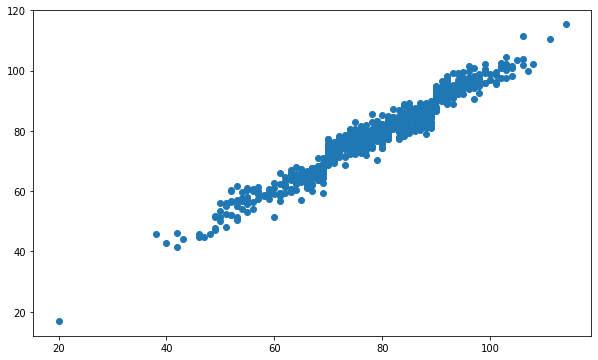

In [409]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.show()

In [0]:
from sklearn import metrics

In [411]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.408542455428424
MSE: 9.240984124421159
RMSE: 3.039898702986854


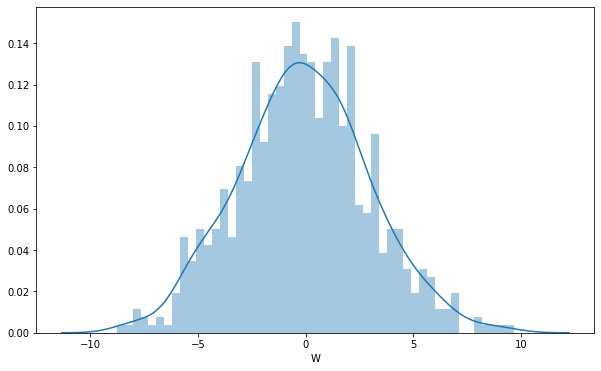

In [413]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-predictions),bins=50)
plt.show()

In [414]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
G,0.148894
R,0.035649
AB,-0.016409
H,0.012778
2B,0.000826
3B,0.003345
HR,0.004029
BB,-0.004338
SO,0.000609
SB,0.000678
